In [1]:
import pandas as pd
import numpy as np

import scipy
# from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# read CSV
df=pd.read_csv("unifed_csv_20210124_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32924 entries, 0 to 32923
Data columns (total 56 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 32924 non-null  object 
 1   rank                                         32921 non-null  float64
 2   country_code                                 29489 non-null  object 
 3   city                                         29489 non-null  object 
 4   status                                       32924 non-null  object 
 5   num_funding_rounds                           11995 non-null  float64
 6   total_funding_usd                            9131 non-null   float64
 7   founded_on                                   32924 non-null  object 
 8   employee_count                               32924 non-null  object 
 9   cat_pca_0                                    32924 non-null  float64
 10

In [3]:
# keep_col = ['operating', 'closed', 'success', 'Financial Services', 'FinTech', 'Blockchain', 'Cryptocurrency', 'fund_rd_raised_amount_usd', 'investment_count', 'any_partner', 'event_count', 'job_duration', 'gender_male', 'gender_female', 'degree_type', 'subject_Computer Science', 'subject_Economics', 'subject_Finance', 'USA', 'GBR', 'CHN', 'city_London', 'city_New_York', 'city_San_Francisco', 'ROI', 'mean_norm_amount_delta', 'roi_from_mean_momentum']

# 'employee_count'
keep_col = ['rank','num_funding_rounds','total_funding_usd','fd_rd_latest_investment','fd_rd_mean_momentum','fd_rd_num_invested_by_top_100','fd_rd_first_fund_raised','event_count','job_duration','gender_male','gender_female','degree_type','subject_Business','subject_STEM','subject_Arts_SoSc','num_exec']

# extra_col = ['fd_rd_investment_type_series_unknown','fd_rd_investment_type_grant','fd_rd_investment_type_debt_financing','fd_rd_investment_type_pre_seed','fd_rd_investment_type_post_ipo_equity','fd_rd_investment_type_convertible_note','fd_rd_investment_type_equity_crowdfunding','fd_rd_investment_type_private_equity','fd_rd_investment_type_undisclosed','fd_rd_investment_type_post_ipo_debt','fd_rd_investment_type_corporate_round','fd_rd_investment_type_product_crowdfunding','fd_rd_investment_type_non_equity_assistance','fd_rd_investment_type_initial_coin_offering','fd_rd_investment_type_secondary_market','fd_rd_investment_type_post_ipo_secondary']

df = df[keep_col]

In [4]:
df.dropna(subset=['fd_rd_mean_momentum'], inplace=True)

In [5]:
df.head()

,rank,num_funding_rounds,total_funding_usd,fd_rd_latest_investment,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec
8,27502.0,3.0,4025000.0,1.0,2.964229,NaN,3500000.0,NaN,2188.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
16,18591.0,5.0,13316538.0,1.0,0.934681,0.0,1832166.0,1.0,12073.0,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0
33,5593.0,5.0,57011648.0,3.0,0.825104,2.0,0.0,NaN,19109.0,1.000000,0.000000,0.727273,0.545455,0.000000,0.000000,11.0
43,16818.0,10.0,3180350.0,2.0,0.228600,1.0,1180350.0,3.0,20171.0,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0
47,24688.0,4.0,5700000.0,2.0,0.341418,0.0,2100000.0,NaN,21790.0,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 8 to 32923
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rank                           4094 non-null   float64
 1   num_funding_rounds             4094 non-null   float64
 2   total_funding_usd              4094 non-null   float64
 3   fd_rd_latest_investment        4094 non-null   float64
 4   fd_rd_mean_momentum            4094 non-null   float64
 5   fd_rd_num_invested_by_top_100  2624 non-null   float64
 6   fd_rd_first_fund_raised        3305 non-null   float64
 7   event_count                    1229 non-null   float64
 8   job_duration                   3720 non-null   float64
 9   gender_male                    3720 non-null   float64
 10  gender_female                  3720 non-null   float64
 11  degree_type                    3720 non-null   float64
 12  subject_Business               3720 non-null   

In [7]:
df['total_funding_usd_log'] = np.log(df['total_funding_usd'])
# df['num_funding_rounds'].fillna(0, inplace=True)
# df['total_funding_usd'].fillna(0, inplace=True)
# df['fd_rd_latest_investment'].fillna(df['fd_rd_latest_investment'].mean(), inplace=True)
df['fd_rd_num_invested_by_top_100'].fillna(0, inplace=True)
df['fd_rd_first_fund_raised'].fillna(df['fd_rd_first_fund_raised'].mean(), inplace=True)
df['event_count'].fillna(df['event_count'].mean(), inplace=True)
df['job_duration'].fillna(df['job_duration'].mean(), inplace=True)
df['gender_male'].fillna(df['gender_male'].mean(), inplace=True)
df['gender_female'].fillna(df['gender_female'].mean(), inplace=True)
df['degree_type'].fillna(df['degree_type'].mean(), inplace=True)
df['subject_Business'].fillna(df['subject_Business'].mean(), inplace=True)
df['subject_STEM'].fillna(df['subject_STEM'].mean(), inplace=True)
df['subject_Arts_SoSc'].fillna(df['subject_Arts_SoSc'].mean(), inplace=True)
df['num_exec'].fillna(df['num_exec'].mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 8 to 32923
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rank                           4094 non-null   float64
 1   num_funding_rounds             4094 non-null   float64
 2   total_funding_usd              4094 non-null   float64
 3   fd_rd_latest_investment        4094 non-null   float64
 4   fd_rd_mean_momentum            4094 non-null   float64
 5   fd_rd_num_invested_by_top_100  4094 non-null   float64
 6   fd_rd_first_fund_raised        4094 non-null   float64
 7   event_count                    4094 non-null   float64
 8   job_duration                   4094 non-null   float64
 9   gender_male                    4094 non-null   float64
 10  gender_female                  4094 non-null   float64
 11  degree_type                    4094 non-null   float64
 12  subject_Business               4094 non-null   

[]

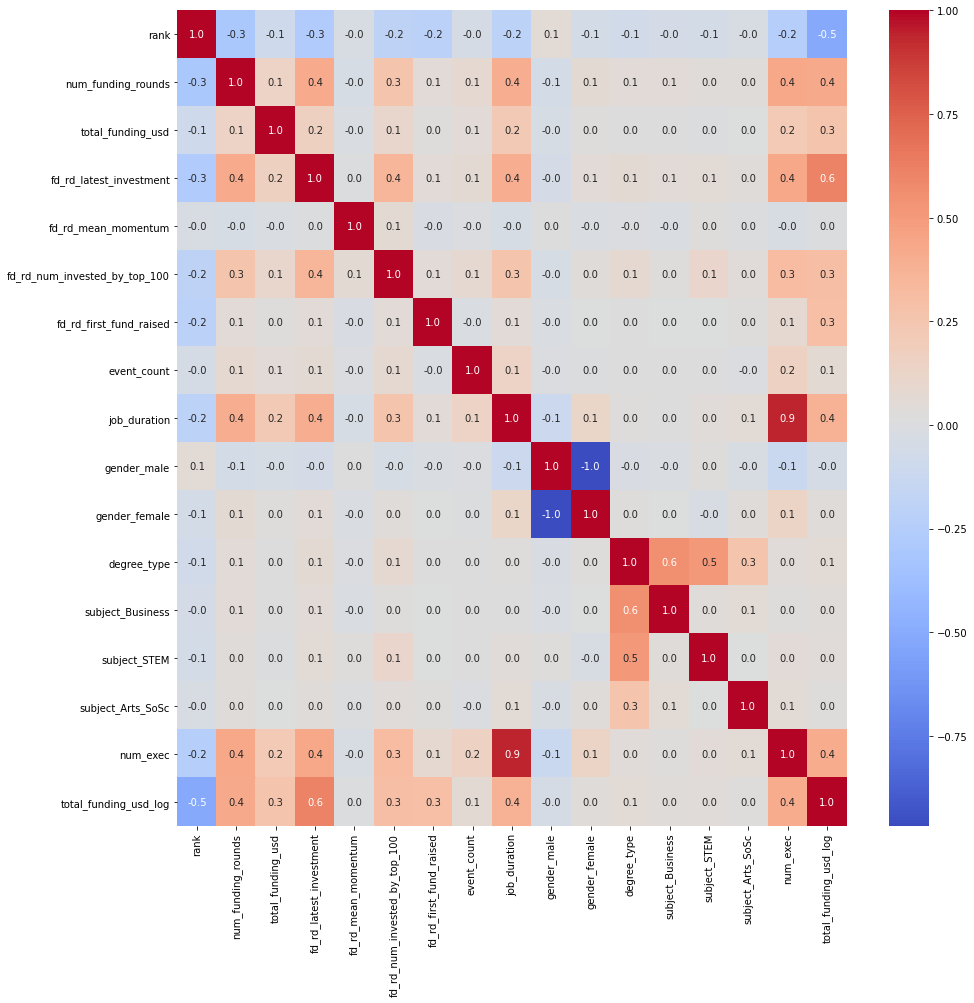

In [9]:
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(df[corrmat.index].corr(), annot=True, fmt='.1f', cmap='coolwarm')
# sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.plot()

In [10]:
X = df

In [11]:
# # elbow plot
# distortions = []
# K = range(1, 10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(X)
#     distortions.append(kmeanModel.inertia_)

# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# kmeans = KMeans(n_clusters=6).fit(x.astype(float))
# centroids = kmeans.cluster_centers_
# # centroids

# plt.scatter(df['any_partner'], df['mean_norm_amount_delta'], c = kmeans.labels_.astype(float), s = 40, alpha = 0.3)
# plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 30)
# plt.title("Clustered data")
# plt.xlabel("mean_norm_amount_delta")
# plt.ylabel("any_partner")
# plt.show()
# # This isn't a useful graph. Just put it here for later use